In [9]:
import numpy as np
from torchvision import datasets
import matplotlib.pyplot as plt


def load_mnist():
    dataset = datasets.MNIST(root='./mnist_data/',
                                   train=True,
                                   download=True)

    mnist = dataset.data.float().numpy().reshape(-1, 784) / 255.
    label = dataset.targets.numpy()
    return mnist, label



''' 
n = number of data
p = number of feature
D = n x p matrix, each row i represents data[i]
'''
D, label = load_mnist()
print('number of data     = {}'.format(D.shape[0]))
print('number of features = {}'.format(D.shape[1]))

number of data     = 60000
number of features = 784


In [32]:
class PCA: 
    def __init__(self, D):
        n = D.shape[0]
        p = D.shape[1]
        sample_mean = D.mean(axis=0)
        X = D - sample_mean
        colume_vecter_covariance = X.transpose() @ X / (n - 1.)
        SS, V = np.linalg.eig(colume_vecter_covariance)
        S = np.sqrt(SS * (SS > 0)) # same as np.sqrt(SS)
        orders = np.argsort(-S)
        S = S[orders]
        V = V[:, orders]

        self.sample_mean = sample_mean
        self.V = V # orthornoral basis matrix of rowspace(X)
        self.S = S # sigular value of X
        
    def encode(self, D, n_dominant):
        X = D - self.sample_mean
        Vd = self.V[:, 0:n_dominant]
        Cd =  X @ Vd
        return Cd
    
    def decode(self, Cd, n_dominant):
        Vd = self.V[:, 0:n_dominant]
        X_hat_d = Cd @ Vd.transpose()
        D_hat_d = X_hat_d + self.sample_mean
        return D_hat_d
    
pca = PCA(D)

$$X = U \Sigma V^{T}$$

$$C_d = X V_{d} = U_{d} \Sigma_{d} $$
$$X \approx \hat{X_{d}} = C_{d} V_{d}^{T} =  U_{d} \Sigma_{d} V_{d}^{T}$$

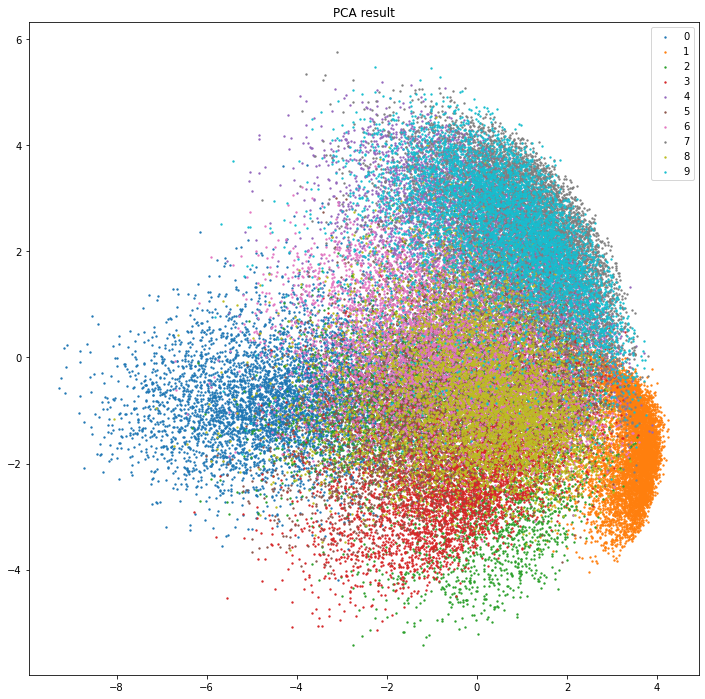

In [33]:
e = pca.encode(data, n_dominant=2)
plt.figure(figsize=(12, 12))
plt.title('PCA result')
for k in range(10):
    class_k = e[label == k]
    plt.scatter(class_k[:, 0], class_k[:, 1], s=2, alpha=0.9, label=str(k))
plt.legend()
plt.show() 

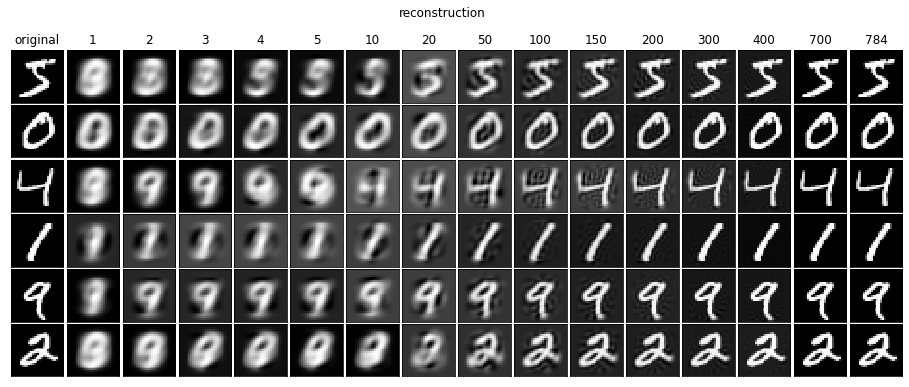

In [34]:

index = [0, 1, 2, 3, 4, 5]
component = [0, 1, 2, 3, 4, 5, 10, 20, 50, 100, 150, 200, 300, 400, 700, 784]
n_data = len(index)
n_col = len(component)

fig = plt.figure(figsize=(n_col, n_data))
fig.suptitle('reconstruction')


ax = fig.add_subplot(n_data, n_col, 1, xticks=[], yticks=[])
ax.set_title('original')
ax.imshow(data[index[0]].reshape(28, 28), cmap='Greys_r', interpolation='nearest')
for i in range(1, n_col):
    ax = fig.add_subplot(n_data, n_col, i+1, xticks=[], yticks=[])
    e = pca.encode(data[index[0]], n_dominant=component[i])
    d = pca.decode(e, n_dominant=component[i])
    ax.set_title('{}'.format(component[i]))
    ax.imshow(d.reshape(28, 28), cmap='Greys_r', interpolation='nearest')

for k in range(1, len(index)):
    ax = fig.add_subplot(n_data, n_col, k * n_col + 1, xticks=[], yticks=[])
    ax.imshow(data[index[k]].reshape(28, 28), cmap='Greys_r', interpolation='nearest')
    for i in range(1, n_col):
        ax = fig.add_subplot(n_data, n_col,  k * n_col + i+1, xticks=[], yticks=[])
        e = pca.encode(data[index[k]], n_dominant=component[i])
        d = pca.decode(e, n_dominant=component[i])
        ax.imshow(d.reshape(28, 28), cmap='Greys_r', interpolation='nearest')



plt.subplots_adjust(hspace=0.04, wspace=0.04)
plt.show()
